In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, shapiro, probplot, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import product

In [13]:
# Load the data and get an overview of the data
file = '../ISLR/data/Boston.csv'
data = pd.read_csv(file)
print(data.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [14]:
# Drop the first column (unnamed)
data = data.iloc[:, 1:]

# Number of predictors
num_predictors = data.shape[1]
print(f'Number of predictors: {num_predictors}')

# Predictors' names
predictor_names = data.columns.tolist()
print(f'Predictor names: {predictor_names}')

Number of predictors: 14
Predictor names: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


In [15]:
# Function to display summary of each predictor in the order they appear in the CSV
def predictor_summary(data):
    summary = {}
    
    for col in data.columns:
        if col in ['tax']: # Numerical predictors with 1 decimal
            summary[col] = data[col].describe().round(1)
        elif col in ['zn', 'indus', 'age', 'ptratio', 'black', 'lstat', 'medv']: # Numerical predictors with 2 decimals
            summary[col] = data[col].describe().round(2)
        elif col in ['rm', 'dis', 'rad']: # Numerical predictors with 3 decimals
            summary[col] = data[col].describe().round(3)
        elif col in ['nox']: # Numerical predictors with 4 decimals
            summary[col] = data[col].describe().round(4)
        else: # Categorical predictors
            summary[col] = data[col].describe().round(5)
    
    return summary

# Call the function to get predictor summaries
predictor_summaries = predictor_summary(data)

# Print summaries
for col, summary in predictor_summaries.items():
    print(f'Summary for {col}:\n', summary, '\n')

Summary for crim:
 count    506.00000
mean       3.61352
std        8.60155
min        0.00632
25%        0.08204
50%        0.25651
75%        3.67708
max       88.97620
Name: crim, dtype: float64 

Summary for zn:
 count    506.00
mean      11.36
std       23.32
min        0.00
25%        0.00
50%        0.00
75%       12.50
max      100.00
Name: zn, dtype: float64 

Summary for indus:
 count    506.00
mean      11.14
std        6.86
min        0.46
25%        5.19
50%        9.69
75%       18.10
max       27.74
Name: indus, dtype: float64 

Summary for chas:
 count    506.00000
mean       0.06917
std        0.25399
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: chas, dtype: float64 

Summary for nox:
 count    506.0000
mean       0.5547
std        0.1159
min        0.3850
25%        0.4490
50%        0.5380
75%        0.6240
max        0.8710
Name: nox, dtype: float64 

Summary for rm:
 count    506.000
mean       6.285
std      

In [16]:
# Number of data points
num_data_points = data.shape[0]
print(f'Number of data points: {num_data_points}')

Number of data points: 506


In [17]:
# Data in a table 
print(data)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3


 Analyzing Predictor: lstat vs. medv 



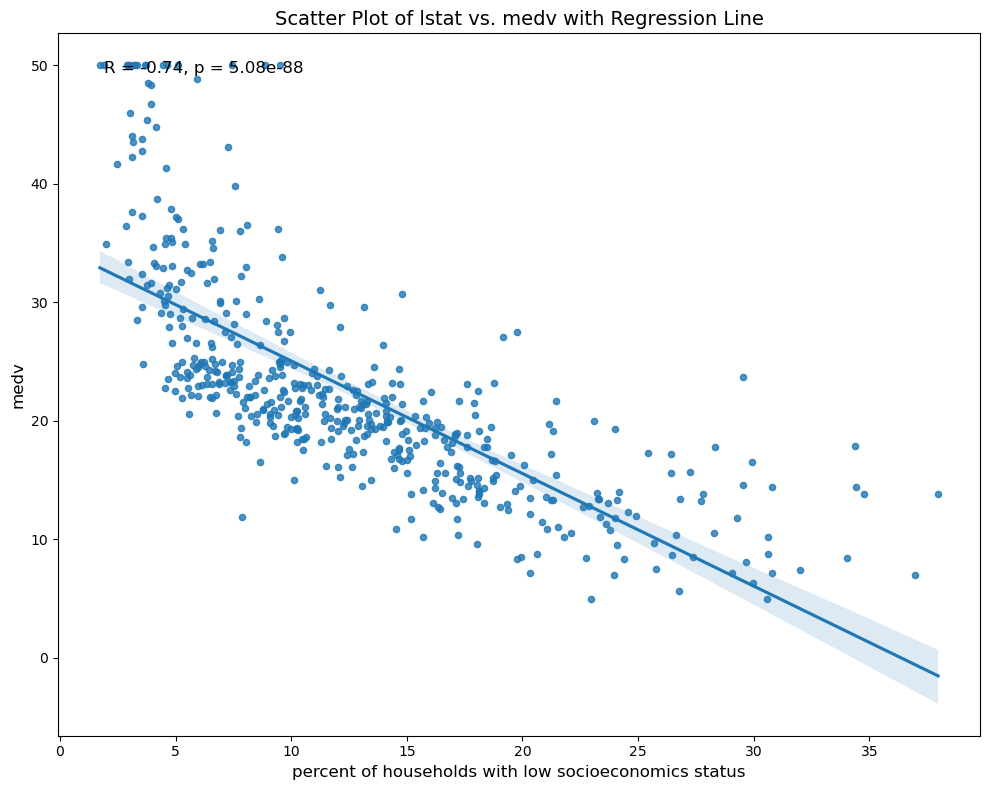


 Analyzing Predictor: rm vs. medv 



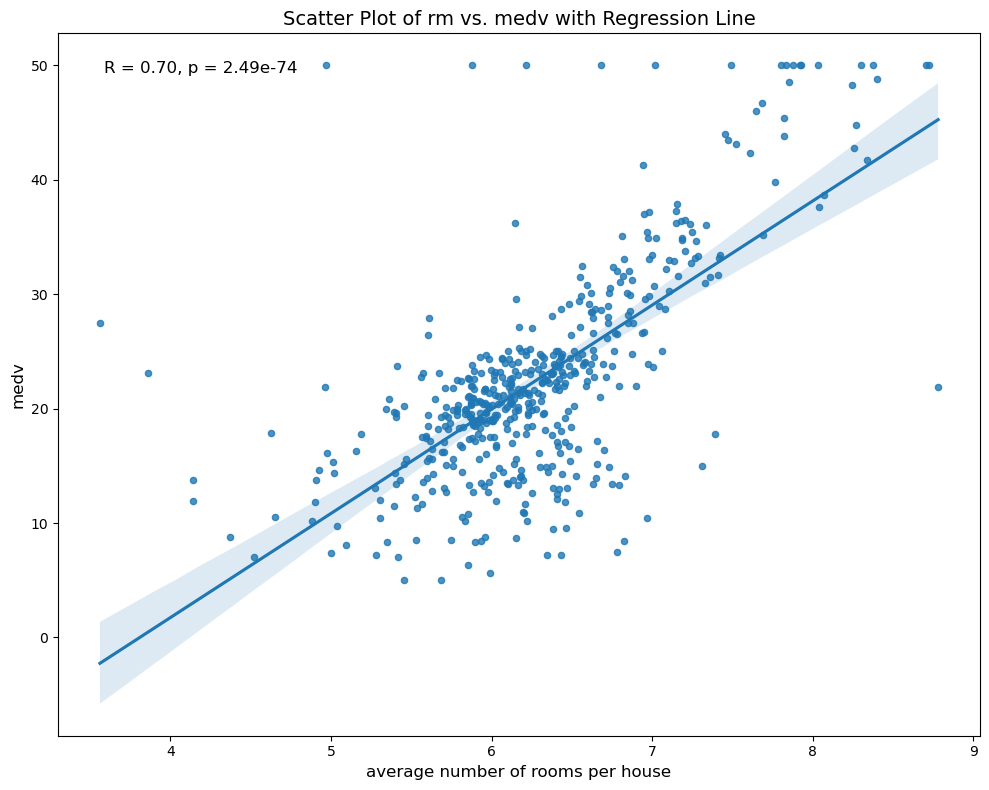


 Analyzing Predictor: age vs. medv 



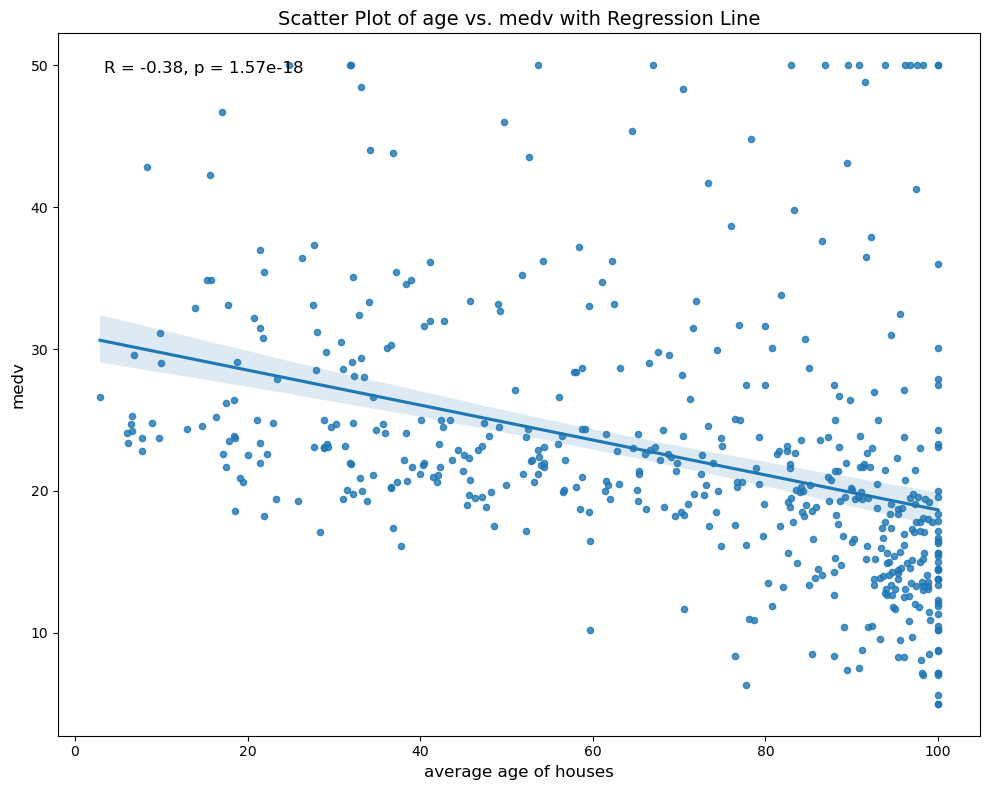

In [18]:
# Function to analyze each numerical feature
def analyze_correlation(data, response):
    for predictor in data.columns:
        if predictor == response:
            continue

        print(f'\n Analyzing Predictor: {predictor} vs. {response} \n')

        # Plot the predictor against the response values
        correlation, p_value = pearsonr(data[predictor], data[response])
        plt.figure(figsize=(10, 8))
        # Scatter plot with transparency to handle overplotting
        # sns.scatterplot(x=data[predictor], y=data[response], alpha=0.5, color='black')
        # # Add regression line with confidence interval
        # sns.regplot(x=data[predictor], y=data[response], ci=95, scatter=False, color='red')
        # # Add density visualization
        # sns.kdeplot(x=data[predictor], y=data[response], cmap='Blues', fill=True, alpha=0.3)
        sns.regplot(x=data[predictor], y=data[response], ci=95, scatter_kws={'s': 20})
        plt.text(x=0.05, y=0.95, s=f'R = {correlation:.2f}, p = {p_value:.2e}', fontsize=12, ha='left', va='center', transform=plt.gca().transAxes)
        if predictor == 'lstat':
            plt.xlabel('percent of households with low socioeconomics status', fontsize=12)
        elif predictor == 'rm':
            plt.xlabel('average number of rooms per house', fontsize=12)
        elif predictor == 'age':
            plt.xlabel('average age of houses', fontsize=12)
        plt.ylabel('medv', fontsize=12)
        plt.title(f'Scatter Plot of {predictor} vs. {response} with Regression Line', fontsize=14)
        plt.tight_layout()
        plt.show()

selected_predictors = data[['lstat', 'rm', 'age', 'medv']]
analyze_correlation(selected_predictors, response='medv')


In [19]:
# Perform Simple linear regressions
# Fit simple linear regression model
def simple_linear_regression(data, response):
   for predictor in data.columns:
        if predictor == response:
            continue

        print(f'\nFitting model: {response} ~ {predictor}')

        # Add a constant intercept to the predictor
        X = sm.add_constant(data[predictor])
        y = data[response]

        # Fit the model
        model = sm.OLS(y, X).fit()

        # Extract residuals
        residuals = model.resid

        # Print the residuals and summary
        print(f'\nResiduals for {response} ~ {predictor}:\n{residuals.describe()}')
        print(model.summary())

selected_predictors = data[['lstat', 'rm', 'age', 'medv']]
simple_linear_regression(selected_predictors, response='medv')


Fitting model: medv ~ lstat

Residuals for medv ~ lstat:
count    5.060000e+02
mean    -1.415469e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           5.08e-88
Time:                        01:26:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust   

Iterpretations:

1. medv ~ lstat

Residuals:
The residuals have a mean close to 0, indicating the model is unbiased.
The standard deviation of residuals is 6.21, which represents the average error in predictions.

R-squared: 0.544
It means that 54.4% of the variance in medv is explained by lstat.

Adjusted R-squared: 0.543
Adjusted for the number of predictors, the model explains 54.3% of the variance.

F-statistic: 601.6
Both the intercept and lstat are statistically significant (p<0.001).

Coefficients:

Interpret(const): 34.5538
When lstat is 0, the predicted medv is 34.5538.

lstat: -0.95
For every 1% increase in lstat, the medv decreases by 0.95 unites, holding all else constant.

2. medv ~ rm

Residuals:
The residuals have a mean close to 0, indicating the model is unbiased.
The standard deviation of residuals is 6.61, which represents the average error in predictions.

R-squared: 0.484
It means that 48.4% of the variance in medv is explained by rm.

Adjusted R-squared: 0.483
Adjusted for the number of predictors, the model explains 48.3% of the variance.

F-statistic: 471.8
Both the intercept and rm are statistically significant (p<0.001).

Coefficients:

Interpret(const): -34.6706
When rm is 0, the predicted medv is -34.6706. However, it is not practically meaningful since rm cannot be 0.

rm: 9.1021
For every 1 room increase in rm, the medv increases by 9.1021 unites, holding all else constant.

3. medv ~ age

Residuals:
The residuals have a mean close to 0, indicating the model is unbiased.
The standard deviation of residuals is 8.52, which represents the average error in predictions.

R-squared: 0.142
It means that 14.2% of the variance in medv is explained by age. 

Adjusted R-squared: 0.140
Adjusted for the number of predictors, the model explains 14.0% of the variance.

F-statistic: 83.48
Both the intercept and age are statistically significant (p<0.001).

Coefficients:

Interpret(const): 30.9787
When age is 0, the predicted medv is 30.9787.

age: -0.1232
For every 1 unit increase in age, the medv decreases by 0.1232 unites, holding all else constant.

4. Summary

lstat is the strongest predictor, explaining 54.4% of the variance.
rm is the second strongest predictor, explaining 48.4% of the variance.
age is the weakest predictor, explaining 14.2% of the variance.


In [20]:
# Obtain a confidence interval for the coefficient estimates for the individual models.
def calc_confidence_intervals(data, response):
    for predictor in data.columns:
        if predictor == response:
            continue

        print(f'\nFitting model: {response} ~ {predictor}\n')

        # Add a constant intercept to the predictor
        X = sm.add_constant(data[predictor])
        y = data[response]

        # Fit the model
        model = sm.OLS(y, X).fit()

        # Obtain the 95% confidence intervals for the coefficients
        confidence_intervals = model.conf_int(alpha=0.05)
        print(f'\n95% Confidence Intervals for {response} ~ {predictor}:\n{confidence_intervals}')

selected_predictors = data[['lstat', 'rm', 'age', 'medv']]
calc_confidence_intervals(selected_predictors, response='medv')


Fitting model: medv ~ lstat


95% Confidence Intervals for medv ~ lstat:
               0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951

Fitting model: medv ~ rm


95% Confidence Intervals for medv ~ rm:
               0          1
const -39.876641 -29.464601
rm      8.278855   9.925363

Fitting model: medv ~ age


95% Confidence Intervals for medv ~ age:
               0          1
const  29.015752  32.941604
age    -0.149647  -0.096679


Interpretation:

1. medv ~ lstat

Intercept (const):

The 95% confidence interval for the intercept is [33.45, 35.66].

This means we are 95% confident that the true intercept (medv when lstat is 0) lies between 33.45 and 35.66.

lstat:

The 95% confidence interval for the lstat coefficient is [-1.03, -0.87].

This means we are 95% confident that the true effect of lstat (percentage of lower-status population) on medv (medv) lies between -1.03 and -0.87.

In other words, for every 1% increase in lstat, the medv decreases by 0.87 to 1.03 units, holding all else constant.

2. medv ~ rm

Intercept (const):

The 95% confidence interval for the intercept is [-39.88, -29.46].

This means we are 95% confident that the true intercept (medv when rm is 0) lies between -39.88 and -29.46.

Note: This intercept is not practically meaningful since rm (average number of rooms) cannot be 0.

rm:

The 95% confidence interval for the rm coefficient is [8.28, 9.93].

This means we are 95% confident that the true effect of rm (average number of rooms) on medv (medv) lies between 8.28 and 9.93.

In other words, for every 1-room increase in rm, the medv increases by 8.28 to 9.93 units, holding all else constant.

3. medv ~ age

Intercept (const):

The 95% confidence interval for the intercept is [29.02, 32.94].

This means we are 95% confident that the true intercept (medv when age is 0) lies between 29.02 and 32.94.

age:

The 95% confidence interval for the age coefficient is [-0.15, -0.10].

This means we are 95% confident that the true effect of age (proportion of owner-occupied units built before 1940) on medv (medv) lies between -0.15 and -0.10.

In other words, for every 1-unit increase in age, the medv decreases by 0.10 to 0.15 units, holding all else constant.

In [21]:
# Use the simple linear regression models
# Predict the medv response values for some selected predictor values. Calculate the prediction intervals for these values.
def calc_prediction_intervals(data, response):
    for predictor in data.columns:
        if predictor == response:
            continue

        print(f'\nFitting model: {response} ~ {predictor}\n')

        # Add a constant intercept to the predictor
        X = sm.add_constant(data[predictor])
        y = data[response]

        # Fit the model
        model = sm.OLS(y, X).fit()

        # Define new predictor values for prediction
        selected_predictor_values = pd.DataFrame({'lstat': [5, 10, 15]})
        selected_predictor_values = sm.add_constant(selected_predictor_values)  # Add a constant for the intercept

        # Generate predictions and prediction intervals
        predictions = model.get_prediction(selected_predictor_values)
        prediction_intervals = predictions.summary_frame(alpha=0.05)

        # Extract the relevant columns (fit, lwr, upr)
        results = prediction_intervals[['mean', 'obs_ci_lower', 'obs_ci_upper']]

        # Rename columns to match R output
        results.columns = ['fit', 'lwr', 'upr']

        # Display the results in a clean format
        print(results.to_string(index=False))

selected_predictors = data[['lstat', 'rm', 'age', 'medv']]
calc_prediction_intervals(selected_predictors, response='medv')


Fitting model: medv ~ lstat

      fit       lwr       upr
29.803594 17.565675 42.041513
25.053347 12.827626 37.279068
20.303101  8.077742 32.528459

Fitting model: medv ~ rm

       fit       lwr        upr
 10.839924 -2.214474  23.894322
 56.350469 42.984303  69.716635
101.861014 87.002385 116.719643

Fitting model: medv ~ age

      fit       lwr       upr
30.362864 13.508970 47.216758
29.747051 12.905870 46.588231
29.131237 12.301738 45.960736


Interpretation:

1. medv ~ lstat

Predicted medv decreases as lstat increases, consistent with the negative coefficient in the model.

Prediction Intervals:

For lstat = 5, the predicted medv is 29.80, with a 95% interval of [17.57, 42.04].

For lstat = 10, the predicted medv is 25.05, with a 95% interval of [12.83, 37.28].

For lstat = 15, the predicted medv is 20.30, with a 95% interval of [8.08, 32.53].

Summary:

The intervals are wide, reflecting high uncertainty in individual predictions. For example, a house with lstat = 5 could have a median value anywhere between ~17.5 and ~42.0 units.

This suggests that while lstat is a statistically significant predictor, there is substantial variability in house prices not explained by lstat alone.

2. medv ~ rm

Predicted medv increases as rm increases, consistent with the positive coefficient in the model.

Prediction Intervals:

For rm = 5, the predicted medv is 10.84, with a 95% interval of [-2.21, 23.89].

For rm = 7.5, the predicted medv is 56.35, with a 95%interval of [42.98, 69.72].

For rm = 10, the predicted medv is 101.86, with a 95% interval of [87.00, 116.72].

Summary:

The intervals widen as rm increases, indicating greater uncertainty for houses with more rooms.

The negative lower bound for rm = 5 is not practically meaningful (room values cannot be negative), suggesting the model may extrapolate poorly for extreme rm values outside the dataset’s range.

rm is a strong predictor, but the wide intervals highlight the need for caution when predicting individual house values.

3. medv ~ age

Predicted medv decreases slightly as age increases, consistent with the negative coefficient in the model.

Prediction Intervals:

For age = 20, the predicted medv is 30.36, with a 95% prediction interval of [13.51, 47.22].

For age = 50, the predicted medv is 29.75, with a 95% interval of [12.91, 46.59].

For age = 80, the predicted medv is 29.13, with a 95% interval of [12.30, 45.96].

Summary:

The intervals are consistently wide, indicating high uncertainty in individual predictions.

The small decrease in predicted medv with increasing age suggests that age has limited practical impact on house values, despite being statistically significant.

In [22]:
# Perform multiple linear regressions
# Fit medv as response with the predictors selected before altogether.
def multiple_linear_regression(data, response):

        print(f'\nFitting model: {response} ~ lstat+rm+age')

        # Add a constant intercept to the predictor
        X = sm.add_constant(data[['lstat', 'rm', 'age']])
        y = data[response]

        # Fit the model
        model = sm.OLS(y, X).fit()

        # Extract residuals
        residuals = model.resid

        # Print the residuals and summary
        print(f'\nResiduals for {response} ~ lstat+rm+age:\n{residuals.describe()}')
        print(model.summary())

selected_predictors = data[['lstat', 'rm', 'age', 'medv']]
multiple_linear_regression(selected_predictors, response='medv')


Fitting model: medv ~ lstat+rm+age

Residuals for medv ~ lstat+rm+age:
count    5.060000e+02
mean    -1.466021e-14
std      5.525660e+00
min     -1.820992e+01
25%     -3.467402e+00
50%     -1.053282e+00
75%      1.957443e+00
max      2.750044e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.20e-110
Time:                        01:26:14   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:          

Interpretation:

medv ~ lstat+rm+age

Residuals:
The residuals have a mean close to 0, indicating the model is unbiased.
The standard deviation of residuals is 5.53, which represents the average error in predictions.
The worst predictions underestimate medv by 18.21 units and overestimate by 27.50 units, indicating outliers or unaccounted factors.

R-squared: 0.639
It means that 63.9% of the variance in medv, an improvement over individual predictors.

Adjusted R-squared: 0.637
Adjusted for the number of predictors, the model explains 63.7% of the variance.

F-statistic:
The model is statistically significant (p<0.001).

Coefficients:

Interpret(const):-1.1753
When lstat+rm+age is 0, the predicted medv is -1.1753.
Intercept not statistically significant (p>0.05).

lstat: -0.6685
For every 1% increase in lstat, the medv decreases by 0.6685 unites, holding rm and age constant.

rm: 5.0191
For every 1 room increase in rm, the medv increases by 5.0191 unites, holding lstat and age constant.

age: 0.0091
age has no statistically significant effect on medv (p>0.05)

Summary:

lstat and rm are strong predictors:

lstat reduces medv, consistent with the simple regression model.

rm increases medv, with a larger effect size than in the simple regression model (5.02 vs. 9.10 in the simple model). This suggests multicollinearity or interaction effects.

age is not significant:

In the multiple regression model, age loses its statistical significance (p = 0.418), unlike in the simple regression model. This indicates that the effect of age is explained away by lstat and rm; age may not directly impact medv when controlling for other factors.

Intercept (const):

The intercept is not statistically significant (p = 0.712), suggesting that when lstat, rm, and age are all zero, the predicted medv is not meaningfully different from zero.

In [23]:
# Fit medv as response with all available predictors altogether
def all_linear_regression(data, response):
    predictors = data.columns.drop(response)

    print(f'\nFitting model: {response} ~ all predictors')

    # Add a constant intercept to the predictors
    X = sm.add_constant(data[predictors])
    y = data[response]

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Extract residuals
    residuals = model.resid

    # Print the residuals and summary
    print(f'\nResiduals for {response} ~ all predictors:\n{residuals.describe()}')
    print(model.summary())

all_linear_regression(data, response='medv')


Fitting model: medv ~ all predictors

Residuals for medv ~ all predictors:
count    5.060000e+02
mean     1.190791e-14
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          6.72e-135
Time:                        01:26:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:      

Interpretation:

medv ~ all predictors

Residuals:
The residuals have a mean close to 0, indicating the model is unbiased.
The standard deviation of residuals is 4.68, which represents the average error in predictions.
The worst predictions underestimate medv by 15.59 units and overestimate by 26.20 units, indicating outliers or unaccounted factors.

R-squared: 0.741
It means that 74.1% of the variance in medv, an improvement over individual predictors.

Adjusted R-squared: 0.734
Adjusted for the number of predictors, the model explains 73.4% of the variance.

F-statistic: 108.1
The model is statistically significant (p<0.001).

Coefficients:

Interpret(const): 36.4595
When all predictors are 0, the predicted medv is 36.4595.

crim: -0.108 
For every 1-unit increase in crim, medv decreases by 0.108 units, holding other predictors constant.

zn: 0.0464
For every 1-unit increase in zn, medv increases by 0.0464 units, holding other predictors constant.

indus: 0.0206
indus has no statistically significant effect on medv (p > 0.05).

chas: 2.6867
For every 1-unit increase in chas, medv increases by 2.6867 units, holding other predictors constant.

nox: -17.7666
For every 1-unit increase in nox, medv decreases by 17.7666 units, holding other predictors constant.

rm: 3.8099
For every 1 room increase in rm, the medv increases by 3.8099 units, holding other predictors constant.

age: 0.0091
age has no statistically significant effect on medv (p>0.05)

dis: -1.4756
For every 1-unit increase in dis, medv decreases by 1.4756 units, holding other predictors constant.

tax: -0.0123
For every 1-unit increase in tax, medv decreases by 0.0123 units, holding other predictors constant.

ptratio: -0.9527
For every 1-unit increase in ptratio, medv decreases by 0.9527 units, holding other predictors constant.

black: 0.0093
For every 1-unit increase in black, the medv increases by 0.0093 units, holding other predictors constant.

lstat: -0.5248
For every 1% increase in lstat, the medv decreases by 0.5248 unites, holding other predictors constant.

Summary:

rm has the largest positive effect on medv.

nox has the largest negative effect on medv.

indus and age are not statistically significant (p > 0.05).

The intercept is statistically significant but not meaningful in this context (all predictors cannot be zero simultaneously).

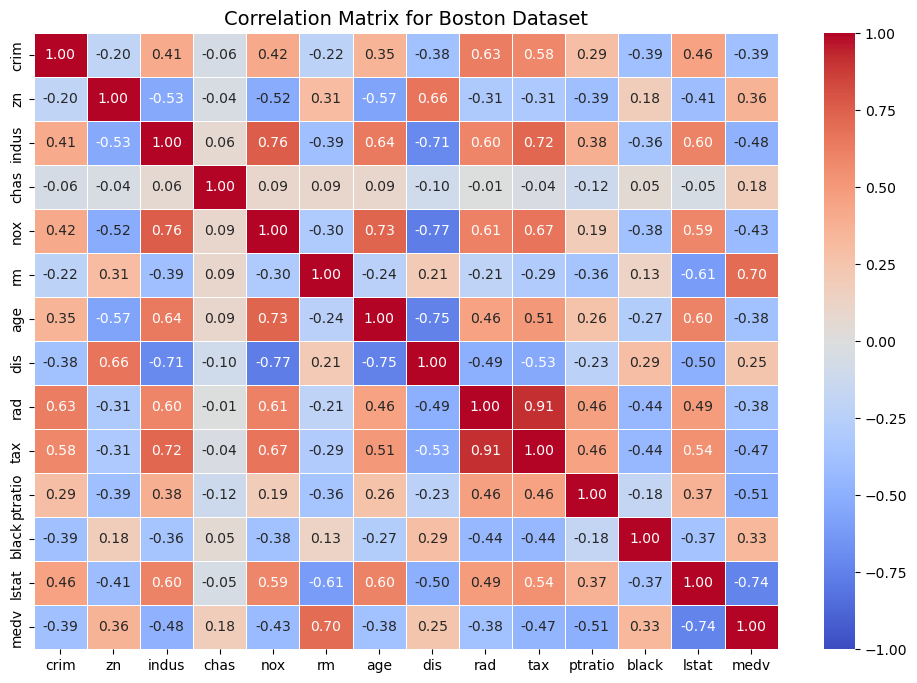

In [24]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Boston Dataset', fontsize=14)
plt.show()

In [25]:
# Use the multiple linear regression model

# Define the predictor values
lstatC = [5, 10, 15]
rmC = [5, 6.5, 8]

# Create the expanded grid
selected_predictor_values = pd.DataFrame(product(lstatC, rmC), columns=["lstat", "rm"])

# Display the result
print(selected_predictor_values)

   lstat   rm
0      5  5.0
1      5  6.5
2      5  8.0
3     10  5.0
4     10  6.5
5     10  8.0
6     15  5.0
7     15  6.5
8     15  8.0


In [26]:
# Predict the medv response values for some selected preditor calues. Calculate the prediction intervals for these values.
def calc_prediction_intervals(data, response):
    print(f'\nFitting model: {response} ~ lstat+rm\n')

    # Add a constant intercept to the predictor
    X = data[['lstat', 'rm']]
    y = data[response]

    # Add constant for intercept
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()

    # Define new predictor values for prediction
    lstatC = [5, 10, 15]
    rmC = [5, 6.5, 8]

    # Create the expanded grid
    selected_predictor_values = pd.DataFrame(product(lstatC, rmC), columns=["lstat", "rm"])
    selected_predictor_values = sm.add_constant(selected_predictor_values)

    # Generate predictions and prediction intervals
    predictions = model.get_prediction(selected_predictor_values)
    prediction_intervals = predictions.summary_frame(alpha=0.05)

    # Extract the relevant columns (fit, lwr, upr)
    results = prediction_intervals[['mean', 'obs_ci_lower', 'obs_ci_upper']]

    # Rename columns to match R output
    results.columns = ['fit', 'lwr', 'upr']

    # Display the results in a clean format
    print(results.to_string(index=False))

calc_prediction_intervals(data, response='medv')


Fitting model: medv ~ lstat+rm

      fit       lwr       upr
20.903875  9.889729 31.918021
28.546057 17.635923 39.456192
36.188239 25.225479 47.150999
17.692084  6.722152 28.662016
25.334266 14.437027 36.231505
32.976448 21.995024 43.957872
14.480292  3.537875 25.422709
22.122474 11.221204 33.023745
29.764656 18.747835 40.781477


Interpretation:

medv ~ lstat+rm

Predicted medv decreases as lstat increases while keeping rm constant, consistent with the negative coefficient in the model.

Predicted medv increases as rm increases while keeping lstat constat, consistant with the positive coefficient int he model.

Prediction Intervals:

For lstat = 5, rm = 5, the predicted medv is 20.90, with a 95% interval of [9.89, 31.92].

For lstat = 5, rm = 6.5, the predicted medv is 28.55, with a 95% interval of [17.64, 39.46].

For lstat = 5, rm = 8, the predicted medv is 36.19, with a 95% interval of [25.23, 47.15].

For lstat = 10, rm = 5, the predicted medv is 17.69, with a 95% interval of [6.72, 28.66].

For lstat = 10, rm = 6.5, the predicted medv is 25.33, with a 95% interval of [14.44, 36.23].

For lstat = 10, rm = 8, the predicted medv is 32.98, with a 95% interval of [21.99, 43.96].

For lstat = 15, rm = 5, the predicted medv is 14.48, with a 95% interval of [3.54, 25.42].

For lstat = 15, rm = 6.5, the predicted medv is 22.12, with a 95% interval of [11.22, 33.02].

For lstat = 15, rm = 8, the predicted medv is 29.76, with a 95% interval of [18.75, 40.78].

Summary:

The prediction intervals are relatively wide, indicating high uncertainty in individual predictions.

For example, a house with lstat = 5 and rm = 5 could have a median value anywhere between ~9.89 and ~31.92 units.

This suggests that while lstat and rm are statistically significant predictors, there is substantial variability in house prices that is not explained by these two factors alone.